In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
df=pd.read_csv('Softec_Medication_Data_Kaggle_V1.csv')

In [3]:
df

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride
0,38182019,0,0,0,0,0,1,0,0
1,66832017,0,0,0,0,0,1,0,0
2,1932020,0,0,0,0,0,1,0,0
3,80992020,0,0,0,0,0,1,0,0
4,92412019,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20406,27862020,0,0,0,0,1,1,0,0
20407,16612020,0,0,0,0,0,1,0,0
20408,75882019,0,0,0,0,0,1,0,0
20409,58112019,0,0,1,0,1,0,0,0


In [4]:
df3 = pd.read_csv('Softec_Patient_Data_Training_Kaggle_V1.csv')
df3

,ID,Age,Race,Sex,State,Zip Code,MSA,Enrollment Type Categorized,Enrollment Months,HCC Score,...,# Part B E&M,# Part B Drugs,# Part B Ambulance,# Dialysis,# Part-B Dialysis,# Rx Claims,# DME,# Miscellaneous,TotalCost_Y_Actual,TotalCost_Y_Expected
0,68802021,68,White,Male,Michigan,48176,11460,10,12.0000,1.33,...,2.0,1,0,0,0.0,16,6,0,41679.13,41679.13
1,3422021,60,Black,Male,Michigan,49224,12980,20,12.0000,4.80,...,0.0,3,0,0,0.0,465,0,0,2045.06,2045.06
2,7892017,43,White,Male,Michigan,49016,12980,20,12.0000,0.25,...,0.0,0,0,0,0.0,100,0,0,419.49,419.49
3,7892020,46,White,Male,Michigan,49016,12980,20,12.0000,0.50,...,0.0,0,0,0,0.0,182,0,0,1540.12,1540.12
4,42792020,84,Black,Female,Michigan,49224,12980,10,12.0000,0.43,...,1.0,0,0,0,0.0,28,0,0,8412.82,8412.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16323,44342019,65,White,Male,Michigan,48858,99022,10,11.0004,0.47,...,1.0,0,0,0,0.0,32,1,0,902.32,902.32
16324,44372017,60,White,Female,Michigan,48891,99022,20,12.0000,0.67,...,2.0,0,0,0,0.0,39,4,0,14249.35,14249.35
16325,44372018,61,White,Female,Michigan,48891,99022,20,12.0000,1.12,...,1.0,0,0,0,0.0,80,3,0,52197.39,52197.39
16326,44682017,91,White,Female,Michigan,48624,99022,10,12.0000,1.06,...,14.0,2,0,0,0.0,16,0,0,2915.57,2915.57


In [5]:
df4 = pd.read_csv('Softec_Socio_Economics_Data_Kaggle_V1.csv')
df4

,ID,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI
0,38182019,74.833333,100.0,43.0,-20.122837,-16.095146,-24.285136,-28.376737,14.16
1,66832017,66.142857,93.0,49.0,0.281248,0.281334,0.508021,0.375466,14.16
2,1932020,73.857143,86.0,60.0,0.530917,0.093942,0.610875,0.513092,14.16
3,80992020,46.500000,83.0,27.0,0.233687,0.196252,0.383752,0.252361,14.16
4,92412019,85.100000,97.0,70.0,0.710880,0.082040,0.609660,0.628680,14.16
...,...,...,...,...,...,...,...,...,...
20406,27862020,60.833333,92.0,19.0,-41.167017,0.167404,-41.203379,-41.251829,15.39
20407,16612020,77.375000,89.0,63.0,0.518867,0.202722,0.501356,0.463585,14.16
20408,75882019,76.566667,100.0,35.0,0.459538,0.153450,0.390582,0.377176,15.39
20409,58112019,62.769231,79.0,48.0,-41.167017,0.167404,-41.203379,-41.251829,14.16


In [6]:
df5=df.merge(df3, how='inner',on='ID')

In [7]:
df_final=df5.merge(df4, how='inner',on='ID')

In [8]:
df_final

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride,Age,...,TotalCost_Y_Actual,TotalCost_Y_Expected,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI
0,38182019,0,0,0,0,0,1,0,0,67,...,1220.66,1220.66,74.833333,100.0,43.0,-20.122837,-16.095146,-24.285136,-28.376737,14.16
1,66832017,0,0,0,0,0,1,0,0,73,...,4550.58,4550.58,66.142857,93.0,49.0,0.281248,0.281334,0.508021,0.375466,14.16
2,1932020,0,0,0,0,0,1,0,0,82,...,22397.08,22397.08,73.857143,86.0,60.0,0.530917,0.093942,0.610875,0.513092,14.16
3,80992020,0,0,0,0,0,1,0,0,79,...,4198.11,4198.11,46.500000,83.0,27.0,0.233687,0.196252,0.383752,0.252361,14.16
4,92412019,0,0,0,0,0,1,0,0,67,...,1534.91,1534.91,85.100000,97.0,70.0,0.710880,0.082040,0.609660,0.628680,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16323,27862020,0,0,0,0,1,1,0,0,56,...,6284.55,6284.55,60.833333,92.0,19.0,-41.167017,0.167404,-41.203379,-41.251829,15.39
16324,16612020,0,0,0,0,0,1,0,0,84,...,319.29,319.29,77.375000,89.0,63.0,0.518867,0.202722,0.501356,0.463585,14.16
16325,75882019,0,0,0,0,0,1,0,0,58,...,5094.20,5094.20,76.566667,100.0,35.0,0.459538,0.153450,0.390582,0.377176,15.39
16326,58112019,0,0,1,0,1,0,0,0,74,...,1588.37,1588.37,62.769231,79.0,48.0,-41.167017,0.167404,-41.203379,-41.251829,14.16


In [9]:
df2 = pd.read_csv('Softec_Patient_Data_Testing_Features.csv')
df7= df.merge(df2, how='inner',on='ID')
df_test=df7.merge(df4, how='inner',on='ID')

In [10]:
df_final.dtypes

ID                                           int64
dapagliflozin                                int64
exenatide                                    int64
glimepiride                                  int64
glyburide and metformin hydrochloride        int64
insulin                                      int64
metformin hydrochloride                      int64
pioglitazone                                 int64
sitagliptin and metformin hydrochloride      int64
Age                                          int64
Race                                        object
Sex                                         object
State                                       object
Zip Code                                     int64
MSA                                         object
Enrollment Type Categorized                  int64
Enrollment Months                          float64
HCC Score                                  float64
Avg. LOS                                   float64
Diagnosis                      

In [11]:
df_final.drop(['Zip Code','MSA','State','Race'],axis=1,inplace=True)

In [12]:
df_final.isnull().sum()

ID                                           0
dapagliflozin                                0
exenatide                                    0
glimepiride                                  0
glyburide and metformin hydrochloride        0
insulin                                      0
metformin hydrochloride                      0
pioglitazone                                 0
sitagliptin and metformin hydrochloride      0
Age                                          0
Sex                                          0
Enrollment Type Categorized                  0
Enrollment Months                            0
HCC Score                                   74
Avg. LOS                                     0
Diagnosis                                    0
# Total Claims                               0
# Hospital OP                                0
# All Physician OP                           0
# Inpatient                                381
# Short Term Stay Hospital                   0
# Long Term S

<AxesSubplot:>

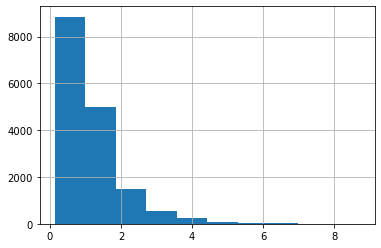

In [13]:
df_final['HCC Score'].hist()

In [14]:
df_final['TotalCost_Y_Actual'].value_counts()

0.00        10
5826.32      2
1341.38      2
4750.13      2
1047.65      2
            ..
61795.91     1
2207.94      1
742.81       1
2365.72      1
4283.30      1
Name: TotalCost_Y_Actual, Length: 16217, dtype: int64

In [15]:
df_test.isnull().sum()

ID                                           0
dapagliflozin                                0
exenatide                                    0
glimepiride                                  0
glyburide and metformin hydrochloride        0
insulin                                      0
metformin hydrochloride                      0
pioglitazone                                 0
sitagliptin and metformin hydrochloride      0
Age                                          0
Race                                         0
Sex                                          0
State                                        0
Zip Code                                     0
MSA                                          0
Enrollment Type Categorized                  0
Enrollment Months                            0
HCC Score                                   13
Avg. LOS                                     0
Diagnosis                                    0
# Total Claims                               0
# Hospital OP

In [16]:
df_final['TotalCost_Y_Actual']=df_final['TotalCost_Y_Actual'].apply(lambda x: 1 if x<1100 else 0)

In [17]:
df_final['TotalCost_Y_Expected']=df_final['TotalCost_Y_Expected'].apply(lambda x: 1 if x<1100 else 0)

In [18]:
#pip install imblearn.under_sampling

In [19]:
df_final.drop(['TotalCost_Y_Expected'],axis=1,inplace=True)

In [20]:
df_final['HCC Score']=df_final['HCC Score'].apply(lambda x: 1 if x>=1 else 0)

In [21]:
df_final['HCC Score'].value_counts()

0    8924
1    7404
Name: HCC Score, dtype: int64

In [22]:
df_final['Age']=df_final['Age'].apply(lambda x: 0 if x<64 else 1)

In [23]:
def func(x):
    if x<=3:
        return x
    elif (x>3 and x<=6):
        return 4
    elif (x>6 and x<=13):
        return 5
    else:
        return 7

In [24]:
df_final['Diagnosis']=df_final['Diagnosis'].apply(lambda x : func(x))

In [25]:
c=list()
for i in df_final.columns:
    if '#' in i:
        c.append(i)

In [26]:
for f in c:
    df_final[f]=df_final[f].apply(lambda x : func(x))

In [27]:
#df_final['Zip Code']=df_final['Zip Code'].astype('object')

In [28]:
#f=df_final['Zip Code'].values

In [29]:
# Split the dataset into features and target variable
X = df_final.drop('TotalCost_Y_Actual', axis=1)
y = df_final['TotalCost_Y_Actual']

# Undersample the majority class
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Save the balanced dataset
df_final = pd.concat([X_resampled, y_resampled], axis=1)

In [30]:
df_final.dtypes

ID                                           int64
dapagliflozin                                int64
exenatide                                    int64
glimepiride                                  int64
glyburide and metformin hydrochloride        int64
insulin                                      int64
metformin hydrochloride                      int64
pioglitazone                                 int64
sitagliptin and metformin hydrochloride      int64
Age                                          int64
Sex                                         object
Enrollment Type Categorized                  int64
Enrollment Months                          float64
HCC Score                                    int64
Avg. LOS                                   float64
Diagnosis                                    int64
# Total Claims                               int64
# Hospital OP                                int64
# All Physician OP                           int64
# Inpatient                    

In [31]:
df_final['Sex']=df_final['Sex'].map({'Male':1,'Female':0})

In [32]:
#Select columns which dtype == 'category'
cat_cols = df_final.select_dtypes(include=['int64','float64']).columns
print(f'Categorical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_final[col].median()
    df_final[col].fillna(fill_value, inplace=True)

Categorical columns: Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'Avg ADI', 'Max ADI', 'Min ADI', 'SVI1', 'SVI

In [33]:
from sklearn.preprocessing import OneHotEncoder
 
#df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
# Select columns which dtype == 'category'
cat_cols = df_final.select_dtypes(include=['object']).columns
print(f'Categorical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_final[col].mode()[0] 
    df_final[col].fillna(fill_value, inplace=True)
     
    # create a list of labels to be encoded in the column
    append_to = list(df_final[col].unique())
 
    # These labels will be use as column headers
    print(append_to)
 
    # Apply OneHotEncoder()
    df_final[append_to] = OneHotEncoder().fit_transform(df_final[[col]]).toarray()
 
    # Drop non-encoded column
    df_final.drop(col, axis=1, inplace=True)
 
    # Drop redundant data
    df_final.drop(append_to[0], axis=1, inplace=True)

print(df_final.columns)

Categorical columns: Index([], dtype='object')
Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'Avg ADI', 'Max ADI

In [34]:
#df_final['Race']=pd.get_dummies(df_final,columns='Race',drop_first=True)

In [35]:
#df_final=pd.get_dummies(df_final,columns=['State','Race'])
#df_final['MSA']=pd.get_dummies(df_final,columns=['MSA',drop_first=True)


In [36]:
df3['Race'].value_counts()

White                    14094
Black                     1261
UnKnown                    343
Asian                      252
Other Race                 236
Hispanic                   112
North American Native       30
Name: Race, dtype: int64

In [37]:
df_final.columns

Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'Avg ADI', 'Max ADI', 'Min ADI', 'SVI1', 'SVI3', 'SVI4', 'SVI', 'M

In [38]:
#df_final.dropna(inplace=True)

In [39]:
df_final.isnull().sum()

ID                                         0
dapagliflozin                              0
exenatide                                  0
glimepiride                                0
glyburide and metformin hydrochloride      0
insulin                                    0
metformin hydrochloride                    0
pioglitazone                               0
sitagliptin and metformin hydrochloride    0
Age                                        0
Sex                                        0
Enrollment Type Categorized                0
Enrollment Months                          0
HCC Score                                  0
Avg. LOS                                   0
Diagnosis                                  0
# Total Claims                             0
# Hospital OP                              0
# All Physician OP                         0
# Inpatient                                0
# Short Term Stay Hospital                 0
# Long Term Stay Hospital                  0
# Rehabili

In [40]:
df_final.drop(['ID','TotalCost_Y_Actual'],axis=1)

,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride,Age,Sex,...,# DME,# Miscellaneous,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI
0,0,0,0,0,0,0,0,1,1,0,...,3,0,76.566667,100.0,35.0,0.459538,0.153450,0.390582,0.377176,14.16
1,0,0,0,0,0,1,0,0,1,1,...,0,0,65.222222,89.0,38.0,0.518867,0.202722,0.501356,0.463585,14.16
2,0,0,0,0,0,1,0,0,0,1,...,1,0,61.181818,80.0,48.0,-14.360588,-14.498202,-14.442701,-14.387013,15.39
3,0,0,0,0,1,0,0,0,1,0,...,1,0,71.583333,94.0,54.0,0.488592,0.451766,0.481356,0.491430,14.16
4,0,0,0,0,0,0,1,0,1,0,...,3,0,54.100000,100.0,19.0,-20.122837,-16.095146,-24.285136,-28.376737,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,0,0,0,0,1,1,0,0,0,1,...,0,0,85.750000,100.0,64.0,-14.360588,-14.498202,-14.442701,-14.387013,15.39
5894,0,0,0,0,0,1,0,0,1,0,...,3,0,17.736842,45.0,2.0,-16.845823,-16.716923,-19.662737,-19.696800,14.16
5895,0,0,0,0,0,1,0,0,0,1,...,3,0,70.521739,96.0,42.0,-20.122837,-16.095146,-24.285136,-28.376737,15.39
5896,0,0,0,0,0,1,0,0,1,1,...,3,0,82.375000,91.0,65.0,0.468933,0.073683,0.597367,0.472017,14.16


In [41]:
#pip install -U imbalanced-learn
df_final.dtypes

ID                                           int64
dapagliflozin                                int64
exenatide                                    int64
glimepiride                                  int64
glyburide and metformin hydrochloride        int64
insulin                                      int64
metformin hydrochloride                      int64
pioglitazone                                 int64
sitagliptin and metformin hydrochloride      int64
Age                                          int64
Sex                                          int64
Enrollment Type Categorized                  int64
Enrollment Months                          float64
HCC Score                                    int64
Avg. LOS                                   float64
Diagnosis                                    int64
# Total Claims                               int64
# Hospital OP                                int64
# All Physician OP                           int64
# Inpatient                    

In [42]:
df_final

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride,Age,...,# Miscellaneous,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI,TotalCost_Y_Actual
0,62442018,0,0,0,0,0,0,0,1,1,...,0,76.566667,100.0,35.0,0.459538,0.153450,0.390582,0.377176,14.16,0
1,14842021,0,0,0,0,0,1,0,0,1,...,0,65.222222,89.0,38.0,0.518867,0.202722,0.501356,0.463585,14.16,0
2,58062019,0,0,0,0,0,1,0,0,0,...,0,61.181818,80.0,48.0,-14.360588,-14.498202,-14.442701,-14.387013,15.39,0
3,29092021,0,0,0,0,1,0,0,0,1,...,0,71.583333,94.0,54.0,0.488592,0.451766,0.481356,0.491430,14.16,0
4,51212018,0,0,0,0,0,0,1,0,1,...,0,54.100000,100.0,19.0,-20.122837,-16.095146,-24.285136,-28.376737,14.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,11762017,0,0,0,0,1,1,0,0,0,...,0,85.750000,100.0,64.0,-14.360588,-14.498202,-14.442701,-14.387013,15.39,1
5894,61312017,0,0,0,0,0,1,0,0,1,...,0,17.736842,45.0,2.0,-16.845823,-16.716923,-19.662737,-19.696800,14.16,1
5895,68642019,0,0,0,0,0,1,0,0,0,...,0,70.521739,96.0,42.0,-20.122837,-16.095146,-24.285136,-28.376737,15.39,1
5896,2152018,0,0,0,0,0,1,0,0,1,...,0,82.375000,91.0,65.0,0.468933,0.073683,0.597367,0.472017,14.16,1


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score
import pandas as pd

# Concatenate the two TF-IDF matrices horizontally
#X = hstack([tfidf1, tfidf2])
X,y=df_final.drop(['ID','TotalCost_Y_Actual'],axis=1),df_final['TotalCost_Y_Actual']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Manually set the classification threshold
threshold = 0.48
predictions_proba = model.predict_proba(X_test)
predictions = (predictions_proba[:,1] >= threshold).astype(int)

accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.9991525423728813


In [44]:
df_test.dtypes

ID                                           int64
dapagliflozin                                int64
exenatide                                    int64
glimepiride                                  int64
glyburide and metformin hydrochloride        int64
insulin                                      int64
metformin hydrochloride                      int64
pioglitazone                                 int64
sitagliptin and metformin hydrochloride      int64
Age                                          int64
Race                                        object
Sex                                         object
State                                       object
Zip Code                                    object
MSA                                         object
Enrollment Type Categorized                  int64
Enrollment Months                          float64
HCC Score                                  float64
Avg. LOS                                   float64
Diagnosis                      

In [45]:
df_test['Zip Code']

0       49770
1       49755
2       48748
3       48911
4       48624
        ...  
4079    48911
4080    48915
4081    48875
4082    48911
4083    48507
Name: Zip Code, Length: 4084, dtype: object

In [46]:
df_test.drop(['Zip Code','MSA','State','Race'],axis=1,inplace=True)

In [47]:
#df_test.drop('Zip Code',axis=1,inplace=True)

In [48]:
df_test['Sex']=df_test['Sex'].map({'Male':1,'Female':0})
df_test['HCC Score']=df_test['HCC Score'].apply(lambda x: 1 if x>=1 else 0)
df_test['Age']=df_test['Age'].apply(lambda x: 0 if x<64 else 1)
df_test['Diagnosis']=df_test['Diagnosis'].apply(lambda x : func(x))
c=list()
for i in df_test.columns:
    if '#' in i:
        c.append(i)
for f in c:
    df_test[f]=df_test[f].apply(lambda x : func(x))

from sklearn.preprocessing import OneHotEncoder
 
#df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
# Select columns which dtype == 'category'
cat_cols = df_test.select_dtypes(include=['object']).columns
print(f'Categorical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_test[col].mode()[0] 
    df_test[col].fillna(fill_value, inplace=True)
     
    # create a list of labels to be encoded in the column
    append_to = list(df_test[col].unique())
 
    # These labels will be use as column headers
    print(append_to)
 
    # Apply OneHotEncoder()
    df_test[append_to] = OneHotEncoder().fit_transform(df_test[[col]]).toarray()
 
    # Drop non-encoded column
    df_test.drop(col, axis=1, inplace=True)
 
    # Drop redundant data
    df_test.drop(append_to[0], axis=1, inplace=True)

print(df_test.columns)

Categorical columns: Index([], dtype='object')
Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'Avg ADI', 'Max ADI

In [49]:
#df_test['Sex']=df_test['Sex'].map({'Male':1,'Female':0})

In [50]:
#Select columns which dtype == 'category'
cat_cols = df_test.select_dtypes(include=['int64','float64']).columns
print(f'Categorical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_test[col].median()
    df_test[col].fillna(fill_value, inplace=True)

Categorical columns: Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'Avg ADI', 'Max ADI', 'Min ADI', 'SVI1', 'SVI

In [51]:
df_test.dtypes

ID                                           int64
dapagliflozin                                int64
exenatide                                    int64
glimepiride                                  int64
glyburide and metformin hydrochloride        int64
insulin                                      int64
metformin hydrochloride                      int64
pioglitazone                                 int64
sitagliptin and metformin hydrochloride      int64
Age                                          int64
Sex                                          int64
Enrollment Type Categorized                  int64
Enrollment Months                          float64
HCC Score                                    int64
Avg. LOS                                   float64
Diagnosis                                    int64
# Total Claims                               int64
# Hospital OP                                int64
# All Physician OP                           int64
# Inpatient                    

In [52]:
df_final.dtypes

ID                                           int64
dapagliflozin                                int64
exenatide                                    int64
glimepiride                                  int64
glyburide and metformin hydrochloride        int64
insulin                                      int64
metformin hydrochloride                      int64
pioglitazone                                 int64
sitagliptin and metformin hydrochloride      int64
Age                                          int64
Sex                                          int64
Enrollment Type Categorized                  int64
Enrollment Months                          float64
HCC Score                                    int64
Avg. LOS                                   float64
Diagnosis                                    int64
# Total Claims                               int64
# Hospital OP                                int64
# All Physician OP                           int64
# Inpatient                    

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Concatenate the two TF-IDF matrices horizontally
#X = hstack([tfidf1, tfidf2])
X,y=df_final.drop(['ID','TotalCost_Y_Actual'],axis=1),df_final['TotalCost_Y_Actual']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1000,class_weight='balanced')
model.fit(X, y)

# Manually set the classification threshold
threshold = 0.81
predictions_proba = model.predict_proba(X_test)
predictions = (predictions_proba[:,1] >= threshold).astype(int)

accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.8694915254237288


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load your dataset
#X, y = load_dataset()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a logistic regression model

# Define class weights
class_weights = {0: 1, 1: 2}

model = LogisticRegression(class_weight=class_weights)

# Train the model with class weights
model.fit(X, y)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the performance using precision, recall, F1 score, and AUC-ROC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


Precision: 0.65
Recall: 0.89
F1 score: 0.75
AUC-ROC: 0.71


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
X_t=df_test.drop(['ID'],axis=1)
predicted = model.predict(X_t)

In [56]:
predicted

array([0, 0, 0, ..., 0, 1, 0])

In [57]:
df_test['Y']=predicted

In [58]:
df_test['Prediction']=df_test['Y']

In [59]:
df_test['Prediction'].value_counts()

0    3277
1     807
Name: Prediction, dtype: int64

In [60]:
df_test[['ID','Prediction']].to_csv('AIC_A.csv',index=False)

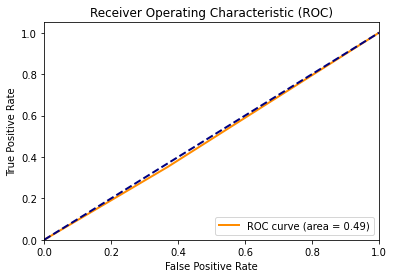

In [61]:
# Assuming y_pred and y_true are arrays containing the predicted and true target variable values for the test set
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
